# import all libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import string

# Text Processing libraries
import nltk
from nltk.stem import PorterStemmer

# 1.data cleaning¶
# 2.EDA
# 3.Text preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

# analysis about data with some most common commands


In [3]:
data = pd.read_csv('Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
data.shape

(232074, 3)

In [5]:
df = data.sample(n=10000, random_state=42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 74414 to 224640
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [7]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [8]:
df['Unnamed: 0'].is_unique

True

In [9]:
df.drop(columns = 'Unnamed: 0',inplace=True)

In [10]:
df.head()

,text,class
74414,I Don't know?7? Months self harm free and the ...,suicide
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,I've honestly got no idea what to do anymore.I...,suicide
30673,Do you ever just cry? Like you just think abou...,non-suicide


In [11]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [12]:
df.duplicated().sum()

0

non-suicide    5048
suicide        4952
Name: class, dtype: int64


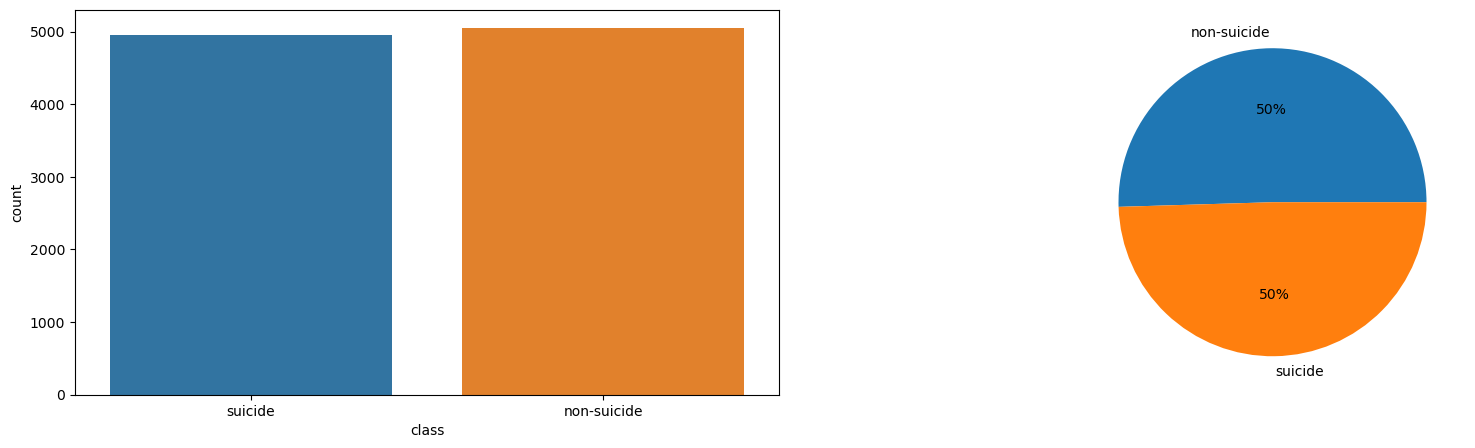

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

classCnt = df['class'].value_counts()
print(classCnt)

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='class')

plt.subplot(1, 2, 2)
plt.pie(classCnt, labels=classCnt.index, autopct='%.0f%%')

plt.show()



# 3.Data Preprocessing
1.Lower case
2.Tokenization
3.Removing special charcater
4.Removing stop words and punctuation
5.stemming

# Before Preprocessing

In [14]:
df.head()

,text,class
74414,I Don't know?7? Months self harm free and the ...,suicide
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,I've honestly got no idea what to do anymore.I...,suicide
30673,Do you ever just cry? Like you just think abou...,non-suicide


In [26]:
df['text']= df['text'].str.lower()

In [27]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [29]:
# df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))

In [ ]:
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])

In [ ]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

# After Preprocessing

In [19]:
df.head()

,text,class
74414,dont know7 months self harm free urge gets str...,suicide
149516,start becoming rich start company become 16 af...,non-suicide
12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
14043,ive honestly got idea anymoreit feels everyone...,suicide
30673,ever cry like think unfair life cry cant cry e...,non-suicide


# wordcloud

In [21]:
#spam messages word cloud
from wordcloud import WordCloud
wc=WordCloud(width=500,min_font_size=10,background_color='white')

In [22]:
sucide_wc=wc.generate(df[df['class']=='suicide']['text'].str.cat(sep=" "))

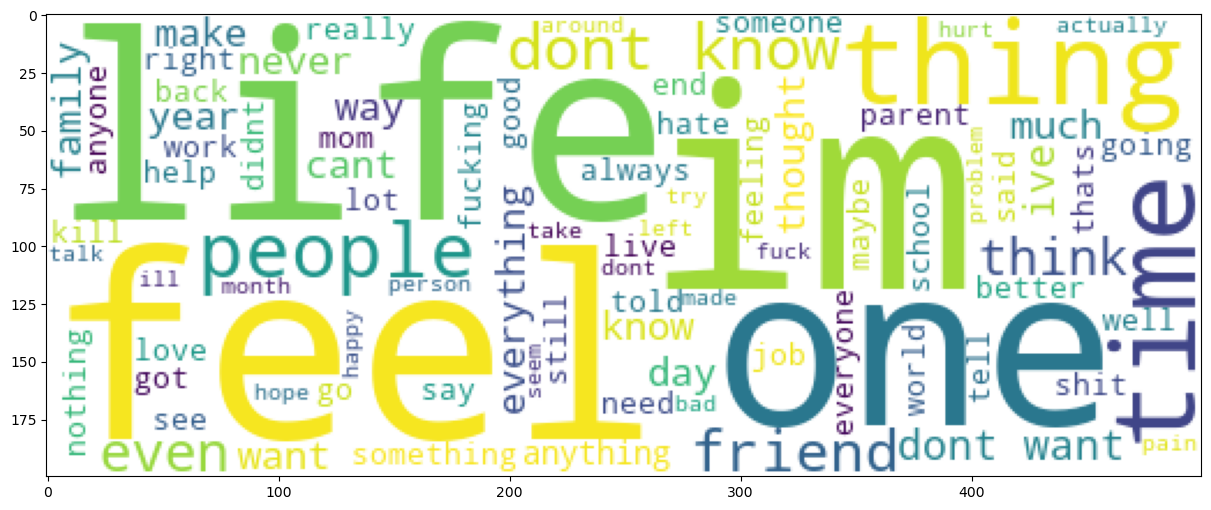

In [23]:
plt.figure(figsize=(15,6))
plt.imshow(sucide_wc)

In [24]:
non_suicide_wc=wc.generate(df[df['class']=='non-suicide']['text'].str.cat(sep=" "))

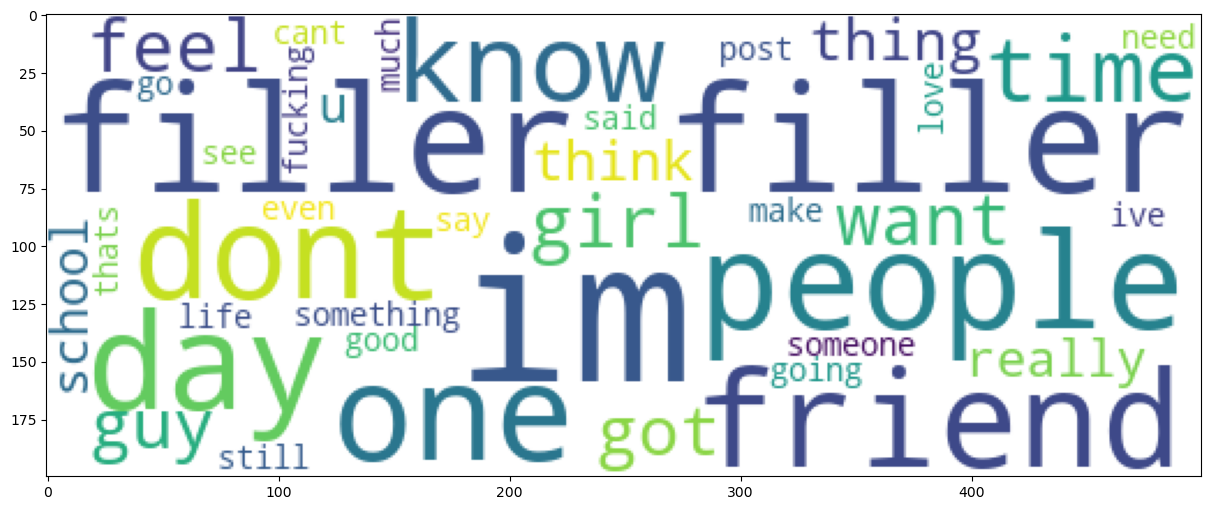

In [25]:
plt.figure(figsize=(15,6))
plt.imshow(non_suicide_wc)

In [30]:
spam_corpus=[]
for msg in df[df['class']=='suicide']['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [31]:
len(spam_corpus)

489924

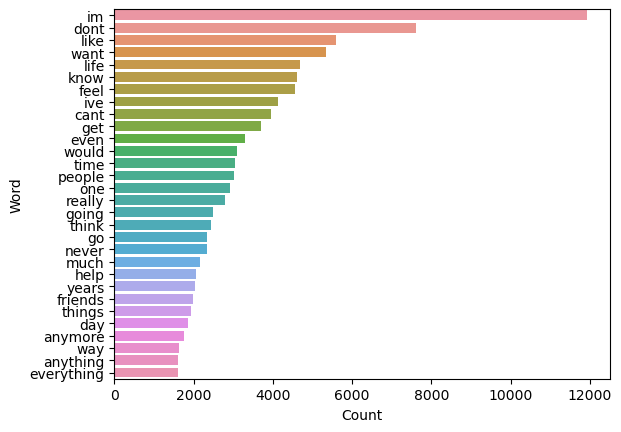

In [32]:
import seaborn as sns
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt



# Count the occurrences of items in spam_corpus
word_counts = Counter(spam_corpus)

# Get the 30 most common items and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame for the data
data = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Count', y='Word', data=data)

# Show the plot
plt.show()


In [33]:
data

,Word,Count
0,im,11921
1,dont,7625
2,like,5595
3,want,5334
4,life,4680
5,know,4601
6,feel,4556
7,ive,4141
8,cant,3963
9,get,3701


In [34]:
nonsuicide_corpus=[]
for msg in df[df['class']=='non-suicide']['text'].tolist():
    for word in msg.split():
        nonsuicide_corpus.append(word)

In [35]:
len(nonsuicide_corpus)

156996

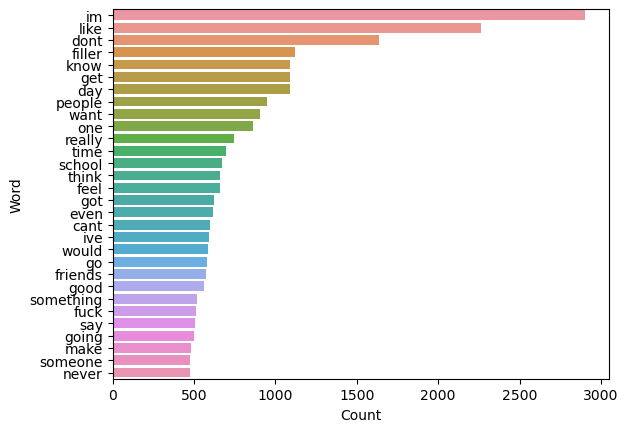

In [36]:
import seaborn as sns
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'spam_corpus' is your list of text data

# Count the occurrences of items in spam_corpus
word_counts = Counter(nonsuicide_corpus)

# Get the 30 most common items and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame for the data
data = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot
sns.barplot(x='Count', y='Word', data=data)

# Show the plot
plt.show()


In [37]:
data

,Word,Count
0,im,2902
1,like,2262
2,dont,1635
3,filler,1123
4,know,1091
5,get,1090
6,day,1089
7,people,947
8,want,904
9,one,863


In [38]:
df.to_csv('file1.csv')

In [39]:
dfnew = pd.read_csv('file1.csv')
dfnew.head()

,Unnamed: 0,text,class
0,74414,dont know7 months self harm free urge gets str...,suicide
1,149516,start becoming rich start company become 16 af...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestly got idea anymoreit feels everyone...,suicide
4,30673,ever cry like think unfair life cry cant cry e...,non-suicide


In [40]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        9999 non-null   object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [41]:
ind = dfnew[dfnew['text'].isnull()].index

In [42]:
df.iloc[ind]

,text,class
102482,,suicide


In [43]:
# ind = dfnew[dfnew['text'].isnull()].index

In [44]:
dfnew.dropna(inplace=True)

# Machine Learning - Model Selection

In [45]:
x,y = dfnew['text'],dfnew['class']

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

# TF-IDF vectorizer

In [52]:
batch_1 = df[:2000]

In [53]:
batch_1[1].value_counts()

KeyError: 1

In [54]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [83]:
from transformers import DistilBertTokenizer, DistilBertModel

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)


In [46]:
# vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
# x =  vectorizer.fit_transform(x).toarray()

In [85]:
def vectorize_data(data):
    texts = data['text'].astype(str).tolist()
    tokenized_input = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    
    with torch.no_grad():
        outputs = model(**tokenized_input)

    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings.numpy()


In [87]:
classifiers = RandomizedSearchCV(RandomForestClassifier(), {'n_estimators': [4, 5], 'criterion': ['entropy'],
    'max_depth': range(1, 4), 'min_samples_split': range(2, 5)}, random_state=12)


In [47]:
# with open('tfidf.pkl', 'wb') as f:
#     pickle.dump(vectorizer, f)    

In [57]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [58]:
X_train.shape,X_test.shape

((6999, 1470), (3000, 1470))

# vectorizing using bert analyzer



In [ ]:
pip install transformers

In [ ]:
# pip install torch


In [ ]:
#pip install tensorflow


In [ ]:
# import pandas as pd
# from transformers import BertTokenizer, BertModel
# import torch

# # Load pre-trained BERT tokenizer and model
# model_name = 'bert-base-uncased'
# tokenizer = BertTokenizer.from_pretrained(model_name)
# model = BertModel.from_pretrained(model_name)

# # Example DataFrame
# dfnew = pd.read_csv('file1.csv')

# # Check the structure of dfnew
# print("DataFrame Head:")
# print(dfnew.head())

# # Vectorize the data in the DataFrame
# # Vectorize the data in the DataFrame
# def vectorize_data(data):
#     # Ensure the 'text' column is converted to a list of strings
#     texts = data['text'].astype(str).tolist()

#     # Tokenize the input sentences
#     tokenized_input = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)

#     # Forward pass to obtain BERT embeddings
#     with torch.no_grad():
#         outputs = model(**tokenized_input)

#     # Extract [CLS] token representation
#     embeddings = outputs.last_hidden_state[:, 0, :]

#     return embeddings

# # Vectorize the data
# vectorized_data = vectorize_data(dfnew)

# # Convert to numpy array for easier inspection
# vectorized_data_np = vectorized_data.numpy()

# # Display the results
# print("\nVectorized Data Shape:", vectorized_data_np.shape)
# print("Vectorized Data:")
# print(vectorized_data_np)


In [ ]:
# def vectorize_data(data):
#     # Ensure the 'text' column is converted to a list of strings
#     texts = data['text'].astype(str).tolist()

#     # Tokenize the input sentences in batches
#     tokenized_input = tokenizer.batch_encode_plus(
#         texts,
#         return_tensors='pt',
#         padding=True,
#         truncation=True,
#         max_length=128,  # Adjust the maximum length as needed
#         batch_size=8  # Adjust the batch size as needed
#     )

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)
#     tokenized_input = {key: value.to(device) for key, value in tokenized_input.items()}

#     # Forward pass to obtain BERT embeddings
#     with torch.no_grad():
#         outputs = model(**tokenized_input)

#     # Extract [CLS] token representation
#     embeddings = outputs.last_hidden_state[:, 0, :]

#     return embeddings



In [ ]:
# vectorized_data = vectorize_data(dfnew)

# # Convert to numpy array for easier inspection
# vectorized_data_np = vectorized_data.numpy()

# # Display the results
# print("\nVectorized Data Shape:", vectorized_data_np.shape)
# print("Vectorized Data:")
# print(vectorized_data_np)

In [ ]:
# print("Column Names:")
# print(dfnew.columns)


In [102]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    # Get the sentiment polarity (ranging from -1 to 1)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

In [ ]:
# from textblob import TextBlob

# # ... (your existing code)

# # Sentiment Analysis function using TextBlob
# def sentiment_analysis(text):
#     analysis = TextBlob(text)
#     # Get the sentiment polarity (ranging from -1 to 1)
#     sentiment_score = analysis.sentiment.polarity
#     return sentiment_score

# # Modify the app function to include sentiment analysis
# def app(input_text):
#     # Define the input text box
#     print('Input: ', input_text)  # Take input from the user

#     # Sentiment Analysis
#     sentiment_score = sentiment_analysis(input_text)
#     print('Sentiment Score:', sentiment_score)

#     # Preprocess the text
#     processed_array = preprocess(input_text)  # Preprocess the text
#     predict = VotingClassifiers.predict(processed_array)  # Model prediction
#     print('Output: ', predict[0])

# # Example Usage
# app('I am tired of my life. I want to end my life.')


In [94]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 435.7 kB/s eta 0:00:02
     -- ---------------------------------- 41.0/636.8 kB 326.8 kB/s eta 0:00:02
     ---- -------------------------------- 81.9/636.8 kB 416.7 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 374.1 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 374.1 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 374.1 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/636.8 kB 312.2 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/636.8 kB 288.1 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/636.8 kB 288.1 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/636.8 kB 288.1 kB/s eta 0:00:02
     -------- --------------------------- 143.4/636.8

In [95]:
from textblob import TextBlob

# Naive Bayes (Voting Classifier)

In [59]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))

Training score: 0.9058436919559937
Testing score: 0.8763333333333333


              precision    recall  f1-score   support

 non-suicide       0.88      0.88      0.88      1542
     suicide       0.88      0.87      0.87      1458

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



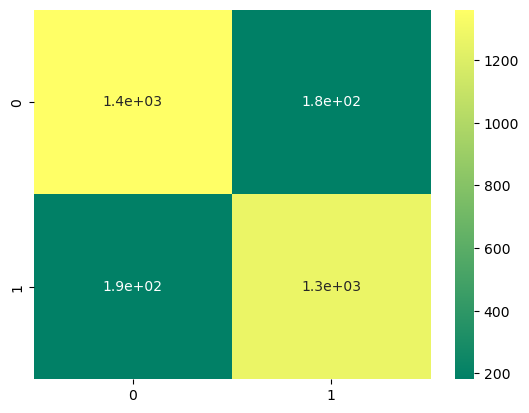

In [60]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

# Random Forest

In [61]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(X_train, y_train)
print('Training score:',classifiers.score(X_train, y_train))
print('Testing score:',classifiers.score(X_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.8146878125446493
Testing score: 0.8033333333333333
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=4,
                       n_estimators=5)


              precision    recall  f1-score   support

 non-suicide       0.76      0.89      0.82      1542
     suicide       0.86      0.71      0.78      1458

    accuracy                           0.80      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.81      0.80      0.80      3000



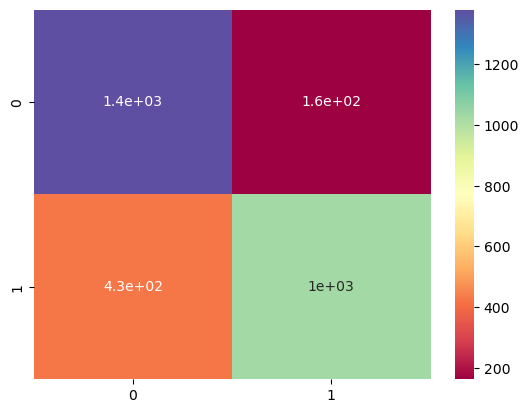

In [62]:
y_act=y_test
y_pred=classifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

# Decision Tree

In [63]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test,y_test))

0.7795399342763252
0.7746666666666666


              precision    recall  f1-score   support

 non-suicide       0.74      0.87      0.80      1542
     suicide       0.83      0.68      0.75      1458

    accuracy                           0.77      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.78      0.77      0.77      3000



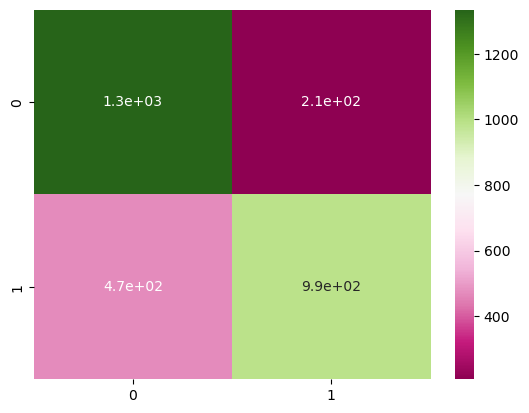

In [64]:
y_act=y_test
y_pred=model2.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

# Gradient Boosting

In [65]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=8,n_jobs=-1)
model3.fit(X_train,y_train)
print('Training score:',model3.score(X_train,y_train))
print('Testing score:',model3.score(X_test,y_test))
model3.best_params_

Training score: 0.7595370767252465
Testing score: 0.7396666666666667


{'n_estimators': 10, 'max_features': 8, 'max_depth': 200, 'learning_rate': 3}

              precision    recall  f1-score   support

 non-suicide       0.73      0.78      0.75      1542
     suicide       0.75      0.70      0.72      1458

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.74      0.74      3000



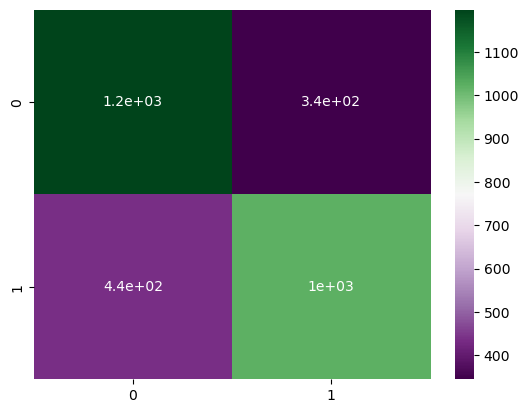

In [66]:
#confusion matrix and classification report
y_act=y_test
y_pred=model3.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn')
print(classification_report(y_act,y_pred))

# XG Boost

In [67]:
model = XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)
model.fit(X_train,y_train.replace({"non-suicide":0,'suicide':1}))
print('Training score:',model.score(X_train,y_train.replace({"non-suicide":0,'suicide':1})))
print('Testing score:',model.score(X_test,y_test.replace({"non-suicide":0,'suicide':1})))

Training score: 0.9982854693527646
Testing score: 0.8483333333333334


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1542
           1       0.83      0.86      0.85      1458

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



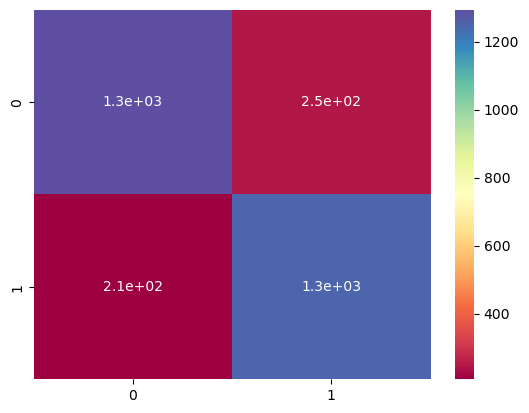

In [68]:
#confusion matrix and classification report
y_act = y_test.replace({"non-suicide":0,'suicide':1})
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))


# K-Nearest Neighbour

In [69]:
model = RandomizedSearchCV(KNeighborsClassifier(),{'n_neighbors':[8],'metric':['manhattan','minkowski','cosine','tanimoto'],
                                                   'p':[1,2]},random_state=42,n_jobs=-1)
model.fit(X_train, y_train)
print('Training score:',model.score(X_train, y_train))
print('Testing score:',model.score(X_test,y_test))
print(model.best_estimator_)

Training score: 0.8668381197313902
Testing score: 0.837
KNeighborsClassifier(metric='cosine', n_neighbors=8, p=1)


              precision    recall  f1-score   support

 non-suicide       0.80      0.91      0.85      1542
     suicide       0.88      0.76      0.82      1458

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



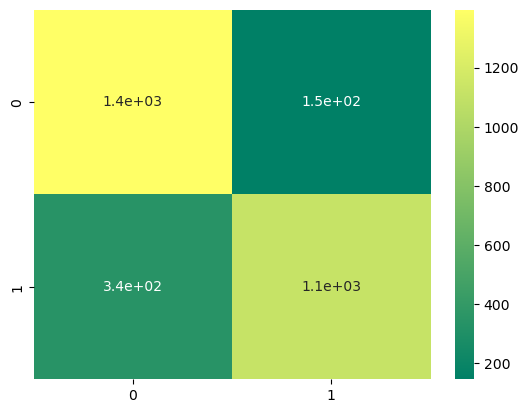

In [70]:
y_act = y_test
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [76]:
df['class'] = df['class'].map({'non-suicide': 0, 'suicide': 1})


In [ ]:
#train_classifier(svc,X_train,y_train,X_test,y_test)



In [92]:
# import warnings
# warnings.filterwarnings('ignore')

# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# import pickle
# import string
# import nltk
# from nltk.stem import PorterStemmer

# # Add the following imports for sentiment analysis
# from transformers import pipeline

# # Suppress warnings
# warnings.filterwarnings('ignore')

# # Load pre-trained sentiment analysis model
# sentiment_analyzer = pipeline('sentiment-analysis')

# # ... (Your existing code)

# # Define preprocess function for sentiment analysis
# def preprocess_sentiment(inp):
#     inp = inp.lower()  # convert to lower case
#     inp = inp.replace(r'[^\w\s]+', '')  # remove punctuations
#     return inp

# # Modify app function to include sentiment analysis
# def app(input_text):
#     print('Input:', input_text)
    
#     # Apply sentiment analysis
#     sentiment_input = preprocess_sentiment(input_text)
#     sentiment_result = sentiment_analyzer(sentiment_input)[0]
#     print('Sentiment:', sentiment_result['label'])
    
#     # Continue with suicide detection prediction
#     processed_array = preprocess(input_text)
#     predict = VotingClassifiers.predict(processed_array)
#     print('Suicide Prediction:', predict[0])

# # ... (The rest of your existing code)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
from textblob import TextBlob

# ... (your existing code)

# Sentiment Analysis function using TextBlob
def sentiment_analysis(text):
    analysis = TextBlob(text)
    # Get the sentiment polarity (ranging from -1 to 1)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

# Modify the app function to include sentiment analysis
def app(input_text):
    # Define the input text box
    print('Input: ', input_text)  # Take input from the user

    # Sentiment Analysis
    sentiment_score = sentiment_analysis(input_text)
    print('Sentiment Score:', sentiment_score)

    # Preprocess the text
    processed_array = preprocess(input_text)  # Preprocess the text
    predict = VotingClassifiers.predict(processed_array)  # Model prediction

    # Adjust the threshold based on your needs
    threshold = 0.0  # Adjust this threshold as needed
    if sentiment_score >= threshold:
        print('Sentiment indicates non-suicidal.')
        print('Output: Non-suicide')
    else:
        print('Sentiment indicates suicidal.')
        print('Output: Suicide')

# Example Usage
app('You should not die')


# Conclusion

In [77]:
# save the Model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(VotingClassifiers, f) 

In [78]:
def preprocess(inp):
    inp = inp.lower() #convert to lower case 
    inp = inp.replace(r'[^\w\s]+', '') #remove punctuations
    inp = [word for word in inp.split() if word not in (stop_words)] #tokenize the sentence
    inp = ' '.join([ps.stem(i) for i in inp]) #stremming
    inputToModel = vectorizer.transform([inp]).toarray() #transform to vector form
    return inputToModel

In [103]:
def app(input_text):
    # Define the input text box
    print('Input: ', input_text)  # Take input from the user

    # Sentiment Analysis
    sentiment_score = sentiment_analysis(input_text)
    print('Sentiment Score:', sentiment_score)

    # Preprocess the text
    processed_array = preprocess(input_text)  # Preprocess the text
    predict = VotingClassifiers.predict(processed_array)  # Model prediction

    # Adjust the threshold based on your needs
    threshold = 0.0  # Adjust this threshold as needed
    if sentiment_score >= threshold:
        print('Sentiment indicates non-suicidal.')
        print('Output: Non-suicide')
    else:
        print('Sentiment indicates suicidal.')
        print('Output: Suicide')

In [99]:
app('i am tired of my life i want to end my life')

Input:  i am tired of my life i want to end my life
Sentiment Score: -0.4
Output:  suicide


In [105]:
app('Have a nice day! Happy Coding😊')

Input:  Have a nice day! Happy Coding😊
Sentiment Score: 0.775
Sentiment indicates non-suicidal.
Output: Non-suicide


In [104]:
app('You should not die')

Input:  You should not die
Sentiment Score: 0.0
Sentiment indicates non-suicidal.
Output: Non-suicide


In [106]:
app('my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives')

Input:  my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives
Sentiment Score: -0.13499999999999998
Sentiment indicates suicidal.
Output: Suicide


In [ ]:
# #import pickle
# pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))

In [128]:
app('my name is kanishka')

Input:  my name is kanishka
Sentiment Score: 0.0


AttributeError: 'VotingClassifier' object has no attribute 'estimators_'

In [127]:
app('i want to kill myself')

Input:  i want to kill myself
Sentiment Score: 0.0


AttributeError: 'VotingClassifier' object has no attribute 'estimators_'

In [ ]:
!pip install ipywidgets

In [3]:
import ipywidgets as widgets
from IPython.display import display
from textblob import TextBlob

# Define the interactive widgets
text_input = widgets.Text(description="Enter text:")
button = widgets.Button(description="Predict")
output_label = widgets.Label()

# Sentiment Analysis function using TextBlob
def textblob_sentiment_analysis(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    return sentiment_score

# Define the event handler for button click
def on_button_click(b):
    # Get the input text
    input_text = text_input.value
    
    # Sentiment Analysis using TextBlob
    sentiment_score_textblob = textblob_sentiment_analysis(input_text)

    # Display the results
    output_label.value = f"TextBlob Sentiment Score: {sentiment_score_textblob}\n"
    
    if sentiment_score_textblob >= 0:  # Adjust the threshold as needed
        output_label.value += 'TextBlob Output: Non -suicide\n'
    else:
        output_label.value += 'TextBlob Output: Suicide\n'

# Attach the event handler to the button
button.on_click(on_button_click)

# Display the widgets
display(text_input)
display(button)
display(output_label)


Text(value='', description='Enter text:')

Button(description='Predict', style=ButtonStyle())

Label(value='')